<a href="https://colab.research.google.com/github/jonahsjlee/programming/blob/main/API_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 Practice writing query:
https://www.saferproducts.gov/RestWebServices/Recall?format=json&RecallID=6029


In [ ]:
!pip install streamlit

In [1]:
import urllib.request
import json
url = 'https://www.saferproducts.gov/RestWebServices/' # Location of the API
query = 'Recall?format=json&ProductType=Exercise' # The query
response = urllib.request.urlopen(url+query)
response_bytes = response.read()
data = json.loads(response_bytes) # Convert response to json
response.close()

                                   RemedyOptions             remedy
0  [{'Option': 'Replace'}, {'Option': 'Refund'}]  [Replace, Refund]
1                         [{'Option': 'Repair'}]           [Repair]
2                                             []                   


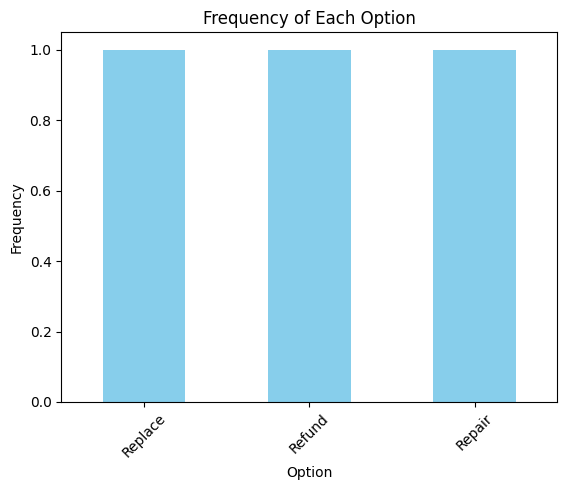

In [6]:
import pandas as pd

def flatten_dict_column(df, source_col, target_col, key):
    clean_values = []
    for items in df[source_col]:
        if items:  # checks if the list is not empty
            values = [item[key] for item in items if key in item]
            clean_values.append(values)
        else:
            clean_values.append('')
    df[target_col] = clean_values

# example
data = {
    'RemedyOptions': [
        [{'Option': 'Replace'}, {'Option': 'Refund'}],
        [{'Option': 'Repair'}],
        []
    ]
}

df = pd.DataFrame(data)
flatten_dict_column(df, 'RemedyOptions', 'remedy', 'Option')
print(df)


import matplotlib.pyplot as plt

def plot_option_frequencies(df, column):
    all_options = [option for sublist in df[column] if sublist != '' for option in sublist]
    option_counts = pd.Series(all_options).value_counts()

    option_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Option')
    plt.ylabel('Frequency')
    plt.title('Frequency of Each Option')
    plt.xticks(rotation=45)
    plt.show()

plot_option_frequencies(df, 'remedy')


In [13]:
import pandas as pd
import requests
import streamlit as st

url = 'https://www.saferproducts.gov/RestWebServices/Recall'
query = '?format=json&RecallTitle=Gas'
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}

raw = requests.get(url+query, headers=header)
if raw.status_code == 200:
    data = raw.json()
    df = pd.DataFrame.from_dict(data)
    temp = df['RemedyOptions']
    clean_values = []
    for i in range(len(temp)):
        if len(temp[i])>0:
            values = []
            for j in range(len(temp[i])):
                values.append(temp[i][j]['Option'])
            clean_values.append(values)
        else:
            clean_values.append('')
    df['remedy'] = clean_values
    remedy_counts = df['remedy'].value_counts()

    st.title('Remedy Statistics')
    st.write(remedy_counts)

else:
    st.title('Error')
    st.write(f"Status code: {raw.status_code}")
    st.write(raw.text)


2024-09-22 23:29:08.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.821 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.822 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-22 23:29:08.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Q5 Data from restcountries.com

In [14]:
import requests
import pandas as pd

def fetch_data(url):
    """
    Fetch data from the specified EPA API endpoint.
    """
    response = requests.get(url)
    if response.status_code == 200:
        try:
            data = response.json()
            return data
        except ValueError:
            print("Error: Unable to decode JSON response.")
            return None
    else:
        print("Error: Received response", response.status_code)
        return None

def wrangle_data(data):
    """
    Convert the list of dictionaries into a DataFrame and perform basic data cleaning.
    """
    if data is not None:
        df = pd.DataFrame(data)
        df.dropna(inplace=True)
        print("Dataframe head:\n", df.head())
        return df
    else:
        return None

# Replace 'YOUR_ENDPOINT' with the actual endpoint URL
endpoint_url = "https://restcountries.com/v3.1/all"
data = fetch_data(endpoint_url)
df = wrangle_data(data)


Dataframe head:
                                                  name    tld cca2 ccn3 cca3  \
2   {'common': 'Switzerland', 'official': 'Swiss C...  [.ch]   CH  756  CHE   
4   {'common': 'Hungary', 'official': 'Hungary', '...  [.hu]   HU  348  HUN   
10  {'common': 'Tunisia', 'official': 'Tunisian Re...  [.tn]   TN  788  TUN   
11  {'common': 'Italy', 'official': 'Italian Repub...  [.it]   IT  380  ITA   
13  {'common': 'Indonesia', 'official': 'Republic ...  [.id]   ID  360  IDN   

   independent               status  unMember  \
2         True  officially-assigned      True   
4         True  officially-assigned      True   
10        True  officially-assigned      True   
11        True  officially-assigned      True   
13        True  officially-assigned      True   

                                           currencies  \
2   {'CHF': {'name': 'Swiss franc', 'symbol': 'Fr.'}}   
4   {'HUF': {'name': 'Hungarian forint', 'symbol':...   
10  {'TND': {'name': 'Tunisian dinar', 'sy